(0, 22)
(0, 22)
3.8062745336974393
[-2.635797]


Text(0, 0.5, 'ln(Ultimate Strain)')

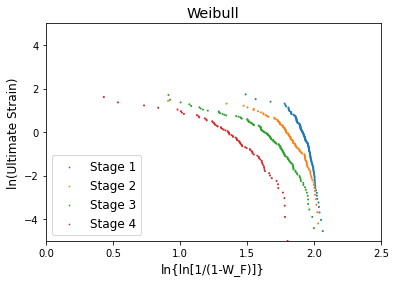

In [1]:
# Here we are trying to take raw data from the lab and evazluate the R^2 values against multiple distributions.
# We are assuming that the data will fit to the Normal distribution, Weibull Distribution, or Gumbel Distribution
# A data set needs to be represented linearly where each distribution has well documented proof for the correct linear # interpretation
# This section of the analysis is a reevaluation of the findings in section 2.5 of Project 10-57 which does not include the method used to evaluate the fit of each curve(p. 106)
# "\\ennyccifs01\disciplines\STR\Structures\Structures Library\NCHRP\534 Cable Investigations\CRP CD-54\Files\Project 10-57.pdf"
# More infomation on reliabilty statistics and accelerated testing can be found in select chapters saved to the structures library.  (\\ennyccifs01\disciplines\STR\Structures\Structures Library)
#     Normal Linearization (N_)
#          http://reliawiki.org/index.php/The_Normal_Distribution
#          https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
#     Weibull Linearization for Ultimate strain (W_)
#          https://www.youtube.com/watch?v=VxOooO114XU&list=WL&index=62&ab_channel=TaylorSparks
#     Gumbel Linearization (G_)
#          https://www.reliawiki.com/index.php/The_Gumbel/SEV_Distribution
#     Lognormal Linearization (L_)
#          http://reliawiki.org/index.php/The_Lognormal_Distribution#Probability_Plotting
# 
# Libraries in use are imported first and provide documentation (see comments in import)
#     
# The raw data is held as an excel file that is not changed by this analysis. 


# Import libraries

import pandas as pd #https://pandas.pydata.org/docs/user_guide/index.html#user-guide
import numpy as np #https://numpy.org/doc/stable/user/whatisnumpy.html
import matplotlib #https://matplotlib.org/stable/users/index.html
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error #https://scikit-learn.org/stable/modules/model_evaluation.html
# Open File

data = pd.read_excel('C:\\Users\\usdf659971\\UDEMY\\Complete-Python-3-Bootcamp-master\\Challenges\\Untitled Folder\\Py Data.xlsx')

# Weibull
    # W_y= ln(ln(1/(1-W_F))) and W_x = ln(Ultimate Strain)
    #     Where: W_F = (W_n-0.5)/(W_N)
    #            W_n = sample number in corrosion stage ordered by Ultimate Strain (%) 
    #            W_N = total number of samples in corrosion stage

data['W_n'] = data.groupby('Corrosion Stage')['Ultimate strain (%)'].rank('dense',ascending = False) #try removing the 'dense' parameter
data['W_N'] = data.groupby(['Corrosion Stage'])['Corrosion Stage'].transform('count') #the transform method preserves the original dataFrame size
data['W_F'] = (data['W_n']-0.5)/(data['W_N'])
data['W_y'] = np.log(np.log((1)/(1-data['W_F'])))
data['W_x'] = np.log(data['Ultimate strain (%)'])

#Linear Regression 
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py 
#https://github.com/sachinruk/deepschool.io/blob/master/DL-Keras_Tensorflow/Lesson%200%20-%20LinRegression.ipynb
reg=linear_model.LinearRegression() #this is a method for linear regression from sklearn https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
data = data.dropna(subset=['W_x','W_y']) #remove nan rows from dataset should be done in excel
print(data[data.eq(np.inf).any(axis=1)].shape) #must print (0, a non zero number) for reg to work
print(data[data[['W_y']].isnull().any(axis=1)].shape) #must print (0, a non zero number) for reg to work

data['W_x_1']=data.groupby('Corrosion Stage')==1
#data['W_x_2']=data.groupby('Corrosion Stage')==2
#data['W_x_3']=data.groupby('Corrosion Stage')==3
#data['W_x_4']=data.groupby('Corrosion Stage')==4
#data['W_y_1']=data.groupby('Corrosion Stage')==1
#data['W_y_2']=data.groupby('Corrosion Stage')==2
#data['W_y_3']=data.groupby('Corrosion Stage')==3
#data['W_y_4']=data.groupby('Corrosion Stage')==4
data['W_x_1']

#reg.fit(data[['W_x_1']],data['W_y_1']) #this will fit all the data sets as one and needs to be grouped into stages
#reg.fit(data[['W_x_2']],data['W_y_2'])
#reg.fit(data[['W_x_3']],data['W_y_3'])
#reg.fit(data[['W_x_4']],data['W_y_4'])

reg.fit(data[['W_x']],data['W_y']) #this will fit all the data sets as one and needs to be grouped into stages
W_b = reg.intercept_
W_m = reg.coef_
print(W_b)
print(W_m)
data['W_m*W_x + W_b'] = W_m*data['W_x'] + W_b

#Plot
    
plt.scatter(data['W_x'], data['W_y'], data['Corrosion Stage']==1, marker = 'o', label = 'Stage 1')
plt.scatter(data['W_x'], data['W_y'], data['Corrosion Stage']==2, marker = 'o', label = 'Stage 2')
plt.scatter(data['W_x'], data['W_y'], data['Corrosion Stage']==3, marker = 'o', label = 'Stage 3')
plt.scatter(data['W_x'], data['W_y'], data['Corrosion Stage']==4, marker = 'o', label = 'Stage 4')
#plt.plot(data['W_x'], data['W_m*W_x + W_b'], data['Corrosion Stage']==1, label = 'Linear Regression Stage 1') #making doubles
#plt.plot(data['W_x'], data['W_m*W_x + W_b'], data['Corrosion Stage']==2, label = 'Linear Regression Stage 2')
#plt.plot(data['W_x'], data['W_m*W_x + W_b'], data['Corrosion Stage']==3, label = 'Linear Regression Stage 3')
#plt.plot(data['W_x'], data['W_m*W_x + W_b'], data['Corrosion Stage']==4, label = 'Linear Regression Stage 4')
plt.rcParams.update({'font.size':12})
plt.legend(loc='lower left', fontsize = 12)
plt.ylim(-5,5)
plt.xlim(0,2.5)
plt.tick_params()
plt.title('Weibull')
plt.xlabel('ln{ln[1/(1-W_F)]}', fontsize = 12)
plt.ylabel('ln(Ultimate Strain)', fontsize = 12)

#Display

#data.head()


In [1]:
data['W_x_1']=data.groupby('Corrosion Stage')==1
#data['W_x_2']=data.groupby('Corrosion Stage')==2
#data['W_x_3']=data.groupby('Corrosion Stage')==3
#data['W_x_4']=data.groupby('Corrosion Stage')==4
#data['W_y_1']=data.groupby('Corrosion Stage')==1
#data['W_y_2']=data.groupby('Corrosion Stage')==2
#data['W_y_3']=data.groupby('Corrosion Stage')==3
#data['W_y_4']=data.groupby('Corrosion Stage')==4
data['W_x_1']

#reg.fit(data[['W_x_1']],data['W_y_1']) #this will fit all the data sets as one and needs to be grouped into stages
#reg.fit(data[['W_x_2']],data['W_y_2'])
#reg.fit(data[['W_x_3']],data['W_y_3'])
#reg.fit(data[['W_x_4']],data['W_y_4'])

NameError: name 'data' is not defined

In [3]:
data[['W_x']]

,W_x
0,1.937054
1,1.990998
2,1.912287
3,1.919177
4,1.919546
...,...
664,0.609516
665,1.953396
666,0.824842
667,1.989269


In [163]:
def r2_rmse( g ):
    r2 = r2_score( g['Actual'], g['Predicted'] )
    rmse = np.sqrt( mean_squared_error( g['Actual'], g['Predicted'] ) )
    return pd.Series( dict(  r2 = r2, rmse = rmse ) )

data.groupby( 'Corrosion Stage' ).apply( r2_rmse ).reset_index()


KeyError: 'Actual'

In [6]:
# Code source: Jaques Grobler
# License: BSD 3 clause
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
#diabetes_X_train = diabetes_X[:-20]
#diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
#diabetes_y_train = diabetes_y[:-20]
#diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'diabetes_X_train' is not defined

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
pk=0.3
N=10000
df = pd.DataFrame({ 'A' : range(1, N + 1 ,1)})
df['binary'] = "Not Cracked"

In [22]:
df

,A,binary
0,1,Not Cracked
1,2,Not Cracked
2,3,Not Cracked
3,4,Not Cracked
4,5,Not Cracked
...,...,...
9995,9996,Not Cracked
9996,9997,Not Cracked
9997,9998,Not Cracked
9998,9999,Not Cracked


In [15]:
df

,A,binary,C
0,1,1,1.0
1,2,1,1.0
2,3,1,NaN
3,4,1,1.0
4,5,1,NaN
...,...,...,...
9995,9996,1,1.0
9996,9997,1,1.0
9997,9998,1,1.0
9998,9999,1,1.0


In [88]:
from reliability.Distributions import Weibull_Distribution


In [ ]:
second_sample

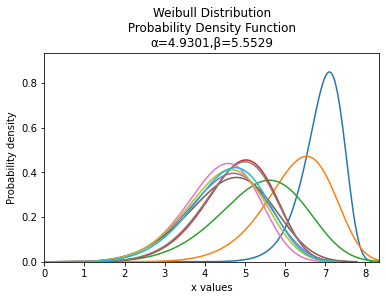

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
data = pd.read_excel('C:\\Users\\usdf659971\\Desktop\\Standard dev.xlsx')

data
for index,row in data.iterrows():
    dist = Weibull_Distribution(alpha=row[5], beta=row[3])  # this created the distribution object
    dist.PDF()  # this creates the plot of the PDF



array([0.00000000e+00, 4.88174150e-03, 5.46270032e-03, 6.10209544e-03,
       6.80476102e-03, 7.57584705e-03, 8.42083455e-03, 9.34555124e-03,
       1.03561877e-02, 1.14593139e-02, 1.26618963e-02, 1.39713151e-02,
       1.53953828e-02, 1.69423616e-02, 1.86209833e-02, 2.04404678e-02,
       2.24105431e-02, 2.45414654e-02, 2.68440395e-02, 2.93296395e-02,
       3.20102307e-02, 3.48983901e-02, 3.80073294e-02, 4.13509161e-02,
       4.49436969e-02, 4.88009195e-02, 5.29385556e-02, 5.73733239e-02,
       6.21227130e-02, 6.72050043e-02, 7.26392946e-02, 7.84455194e-02,
       8.46444748e-02, 9.12578398e-02, 9.83081984e-02, 1.05819061e-01,
       1.13814883e-01, 1.22321088e-01, 1.31364084e-01, 1.40971283e-01,
       1.51171116e-01, 1.61993049e-01, 1.73467597e-01, 1.85626335e-01,
       1.98501909e-01, 2.12128041e-01, 2.26539536e-01, 2.41772284e-01,
       2.57863258e-01, 2.74850510e-01, 2.92773161e-01, 3.11671392e-01,
       3.31586423e-01, 3.52560493e-01, 3.74636831e-01, 3.97859626e-01,
      

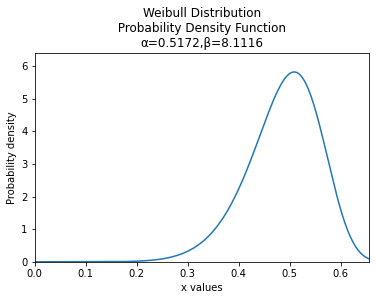

In [200]:
dist = Weibull_Distribution(beta =8.11156697366755, alpha = 0.517164322219396)
dist.PDF()

In [10]:
import pandas as pd #https://pandas.pydata.org/docs/user_guide/index.html#user-guide
import numpy as np #https://numpy.org/doc/stable/user/whatisnumpy.html
import matplotlib #https://matplotlib.org/stable/users/index.html
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
from sklearn import datasets, linear_model
import os
print(os.listdir'))



FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\nyc-fs-02.us.lbgcorp.com\\AWNYCDATA\\H\\CADD\\TBTA\x01821 VN-34\\CSS, QA oversight, Cable Inspection\\Main Cable Internal Inspection'

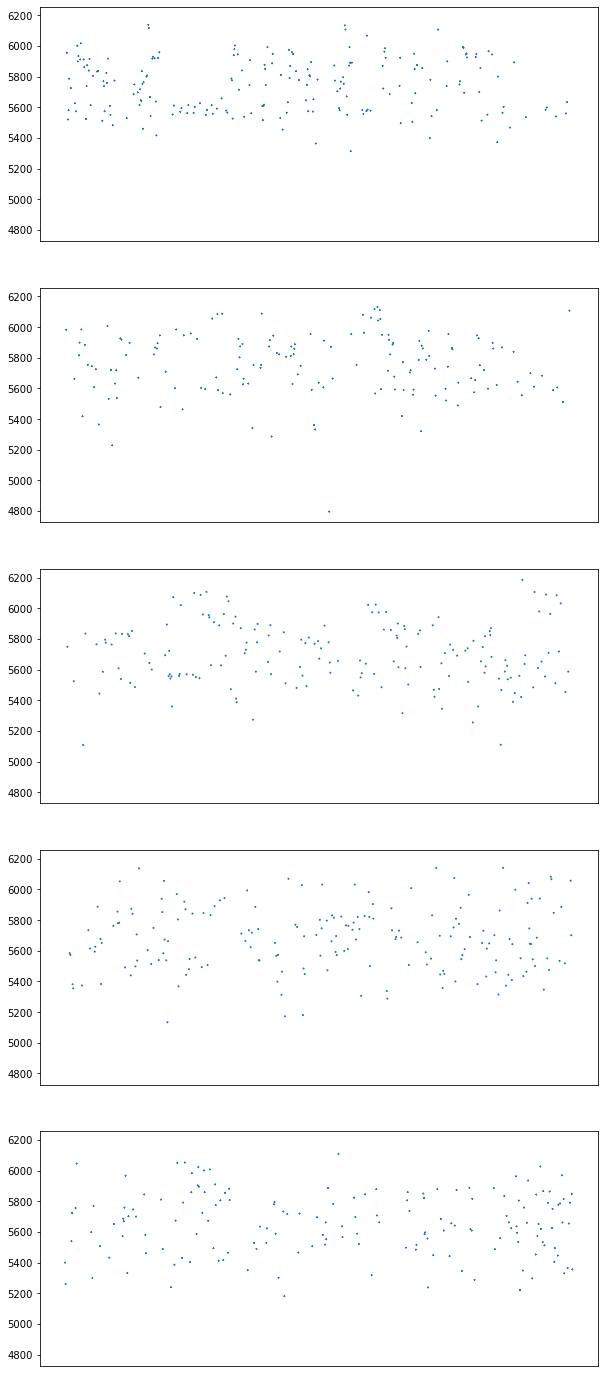

In [2]:
import pandas as pd #https://pandas.pydata.org/docs/user_guide/index.html#user-guide
import numpy as np #https://numpy.org/doc/stable/user/whatisnumpy.html
import matplotlib #https://matplotlib.org/stable/users/index.html
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
from sklearn import datasets, linear_model
import os
#from matplotlib.pyplot import figure

data = pd.read_excel('C:\\Users\\usdf659971\\Documents\\Outliers.xlsx')
data 
figure, axis = plt.subplots(5,1,figsize=(10,25), )
#figure(figsize=(8, 6), dpi=80)
axis[0].scatter(data.index, data['Yield load (lb)'], data['Corrosion Stage']==1, marker = 'x', label = 'Stage 1')
axis[1].scatter(data.index, data['Yield load (lb)'], data['Corrosion Stage']==2, marker = 'x', label = 'Stage 2')
axis[2].scatter(data.index, data['Yield load (lb)'], data['Corrosion Stage']==3, marker = 'o', label = 'Stage 3')
axis[3].scatter(data.index, data['Yield load (lb)'], data['Corrosion Stage']=='4A', marker = 'o', label = 'Stage 4a')
axis[4].scatter(data.index, data['Yield load (lb)'], data['Corrosion Stage']=='4B', marker = 'x', label = 'Stage 4b')
axis[0].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axis[1].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axis[2].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axis[3].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axis[4].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)


In [59]:
data

,Corrosion Stage,Cross section area (sq.In.),Ultimate load (lb),Tensile strength (ksi),Yield load (lb),Yield stress (ksi),Strain at yield (%),Ultimate strain (%),Reduction of area (%),Modulus of elastisity (ksi)
0,4B,0.031024,6433.81010,207.376545,5400.19836,174.062636,0.84937,4.02080,41.322574,26799.700699
1,4B,0.029521,6246.00815,211.569185,5260.98208,178.210513,0.85358,3.79733,42.315953,27272.052572
2,2,0.027391,7232.56674,264.032009,5982.88980,218.423771,0.89214,6.64878,36.348697,31589.055282
3,1,0.029293,7125.59238,243.234036,5955.42514,203.303987,0.89320,6.70101,31.807333,29325.936929
4,3,0.029331,7152.42017,243.842631,5749.02906,196.004308,0.90545,6.94946,12.776786,27792.993220
...,...,...,...,...,...,...,...,...,...,...
868,4B,0.028390,6747.67234,237.607247,5791.01473,203.979411,0.89283,3.46067,28.985438,29458.453424
869,4A,0.029483,7288.86821,247.176083,6057.42115,205.453936,0.90696,5.80240,41.656108,29039.442112
870,4A,0.028428,6803.39641,239.317193,5701.65976,200.568204,0.87977,6.12781,39.424058,29490.389834
871,4B,0.028167,7075.16932,251.121289,5848.65246,207.644600,0.88082,5.10794,35.646571,30501.469291
